# 1.3. Gradient Descent

## This script contains the following:

### 1. Importing your libraries and data
### 2. Checking the original dataset
### 3. Compute loss and gradient descent for Gdansk in 2021

### 01. Import libraries and dataset

In [1]:
# Import libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [2]:
# Create path
path = r'C:\Users\Quinn\Documents\CF - Data Analysis\Machine Learning\ClimateWins'

In [3]:
# Import the dataset
climate = pd.read_pickle(os.path.join(path, '02 Data Sets', 'ClimateWin_Scaled.pkl'))
climate

DATE  MONTH        id  BASEL_cloud_cover  BASEL_wind_speed  \
0      19600101      1 -1.731975           0.660514          -0.02793   
1      19600102      1 -1.731824           0.244897          -0.02793   
2      19600103      1 -1.731673           1.076130          -0.02793   
3      19600104      1 -1.731523          -1.001953          -0.02793   
4      19600105      1 -1.731372           0.244897          -0.02793   
...         ...    ...       ...                ...               ...   
22945  20221027     10  1.731372          -1.833187          -0.02793   
22946  20221028     10  1.731523           0.244897          -0.02793   
22947  20221029     10  1.731673          -0.586336          -0.02793   
22948  20221030     10  1.731824          -0.170720          -0.02793   
22949  20221031     10  1.731975          -0.170720          -0.02793   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0            0.826097       -0.001949               -1.101066   
1            0.735760       -0.001949               -1.058108   
2            1.277781       -0.001949               -1.251420   
3            1.458455       -0.001949               -0.821838   
4            1.729466       -0.001949               -0.746661   
...               ...             ...                     ...   
22945        0.284075        1.037367               -0.005632   
22946        0.103401        0.976231               -0.005632   
22947        0.013064        0.716402               -0.005632   
22948        0.374412        0.487141               -0.005632   
22949        0.735760        0.196744               -0.005632   

       BASEL_precipitation  BASEL_snow_depth  ...  VALENTIA_cloud_cover  \
0                -0.265148         -0.179228  ...             -0.443701   
1                 1.658760         -0.179228  ...              0.783085   
2                 0.155707         -0.179228  ...              0.783085   
3                -0.445514         -0.179228  ...              0.783085   
4                -0.164944         -0.179228  ...             -1.670486   
...                    ...               ...  ...                   ...   
22945            -0.004619         -0.179228  ...             -0.443701   
22946            -0.004619         -0.179228  ...             -0.443701   
22947            -0.004619         -0.179228  ...             -0.443701   
22948            -0.004619         -0.179228  ...             -0.443701   
22949            -0.004619         -0.179228  ...             -0.443701   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.761754          -1.299744                  -0.806427   
1               1.183580          -1.262455                  -1.042055   
2               1.183580          -0.432779                  -1.136306   
3               0.480538           0.387574                  -1.183432   
4              -0.363113           1.729970                  -0.794645   
...                  ...                ...                        ...   
22945          -0.081896          -0.003958                  -0.005290   
22946          -0.081896          -0.003958                  -0.005290   
22947          -0.081896          -0.003958                  -0.005290   
22948          -0.081896          -0.003958                  -0.005290   
22949          -0.081896          -0.003958                  -0.005290   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                   -0.088407            -0.024706           0.372147   
1                    0.503361            -0.024706          -0.829285   
2                   -0.396127            -0.024706          -1.009500   
3                    0.669056            -0.024706          -1.039536   
4                   -0.490810            -0.024706           0.672505   
...                       ...                  ...                ...   
22945               -0.005560            -0.024706  

### 02. Checking the original dataset

In [4]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [5]:
df

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0      19600101      1        -0.528623           -1.016876   
1      19600102      1        -0.582946           -1.107669   
2      19600103      1        -0.257010           -1.084971   
3      19600104      1        -0.555784           -1.209812   
4      19600105      1        -1.003946           -1.209812   
...         ...    ...              ...                 ...   
22945  20221027     10         0.747959            0.628750   
22946  20221028     10         0.856604            0.367720   
22947  20221029     10         0.856604            0.083991   
22948  20221030     10         0.680055            0.265577   
22949  20221031     10         0.422023            0.197483   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0               -1.099163         -0.114356             -0.105836   
1               -1.110927         -0.367511             -0.370915   
2               -1.063873         -0.509912             -0.532908   
3               -1.146217         -0.525734             -0.577088   
4               -1.087400         -0.320045             -0.444548   
...                   ...               ...                   ...   
22945           -0.005167          0.898267              1.042841   
22946           -0.005167          0.945734              1.278467   
22947           -0.005167          0.914089              1.101748   
22948           -0.005167          0.692578              0.880848   
22949           -0.005167          0.439422              0.659949   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0             -0.927601           -0.106469         -0.182904   
1             -0.825294           -0.892676         -0.212437   
2             -0.940389           -0.490837         -0.389635   
3             -1.042696           -0.316124         -0.493001   
4             -0.978754           -0.403481         -0.552067   
...                 ...                 ...               ...   
22945          0.440753            0.906865         -0.005705   
22946          0.466330            0.802037         -0.005705   
22947          0.786039            0.924336         -0.005705   
22948          0.376811            0.697210         -0.005705   
22949          0.159409            0.435140         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0                -1.370824             -0.097084         -0.988280   
1                -1.043881             -0.232112         -0.691740   
2                -0.741156             -0.487164         -0.853490   
3                -0.910682             -0.472161         -0.624345   
4                -0.862246             -0.307127         -0.381721   
...                    ...                   ...               ...   
22945             0.481853              1.268193          0.683127   
22946             0.263891              1.313202          0.561815   
22947             0.300218              1.208181          0.548336   
22948             0.397090              0.923123          0.103526   
22949             0.348654              0.773092         -0.112140   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0               -0.265742       -0.186575       -1.280450   
1               -0.353714       -0.368598       -0.539569   
2               -0.403983       -0.550620       -0.876333   
3               -0.642763       -0.417137       -0.775304   
4               -0.906678       -0.332193       -0.926848   
...                   ...             ...             ...   
22945            0.664244        0.395898       -0.000746   
22946            0.890456        0.541516       -0.000746   
22947            1.053832        0.395898       -0.000746   
22948            0.689378       -0.065226       -0.000746   
22949            0.488300        0.335224       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0 

In [6]:
#You'll need to reduce the dataset to only one year of data. Analyze and pick which year you want to use.
# ---> I want to use year 1965 to test first

In [7]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['DATE','MONTH'], axis=1)

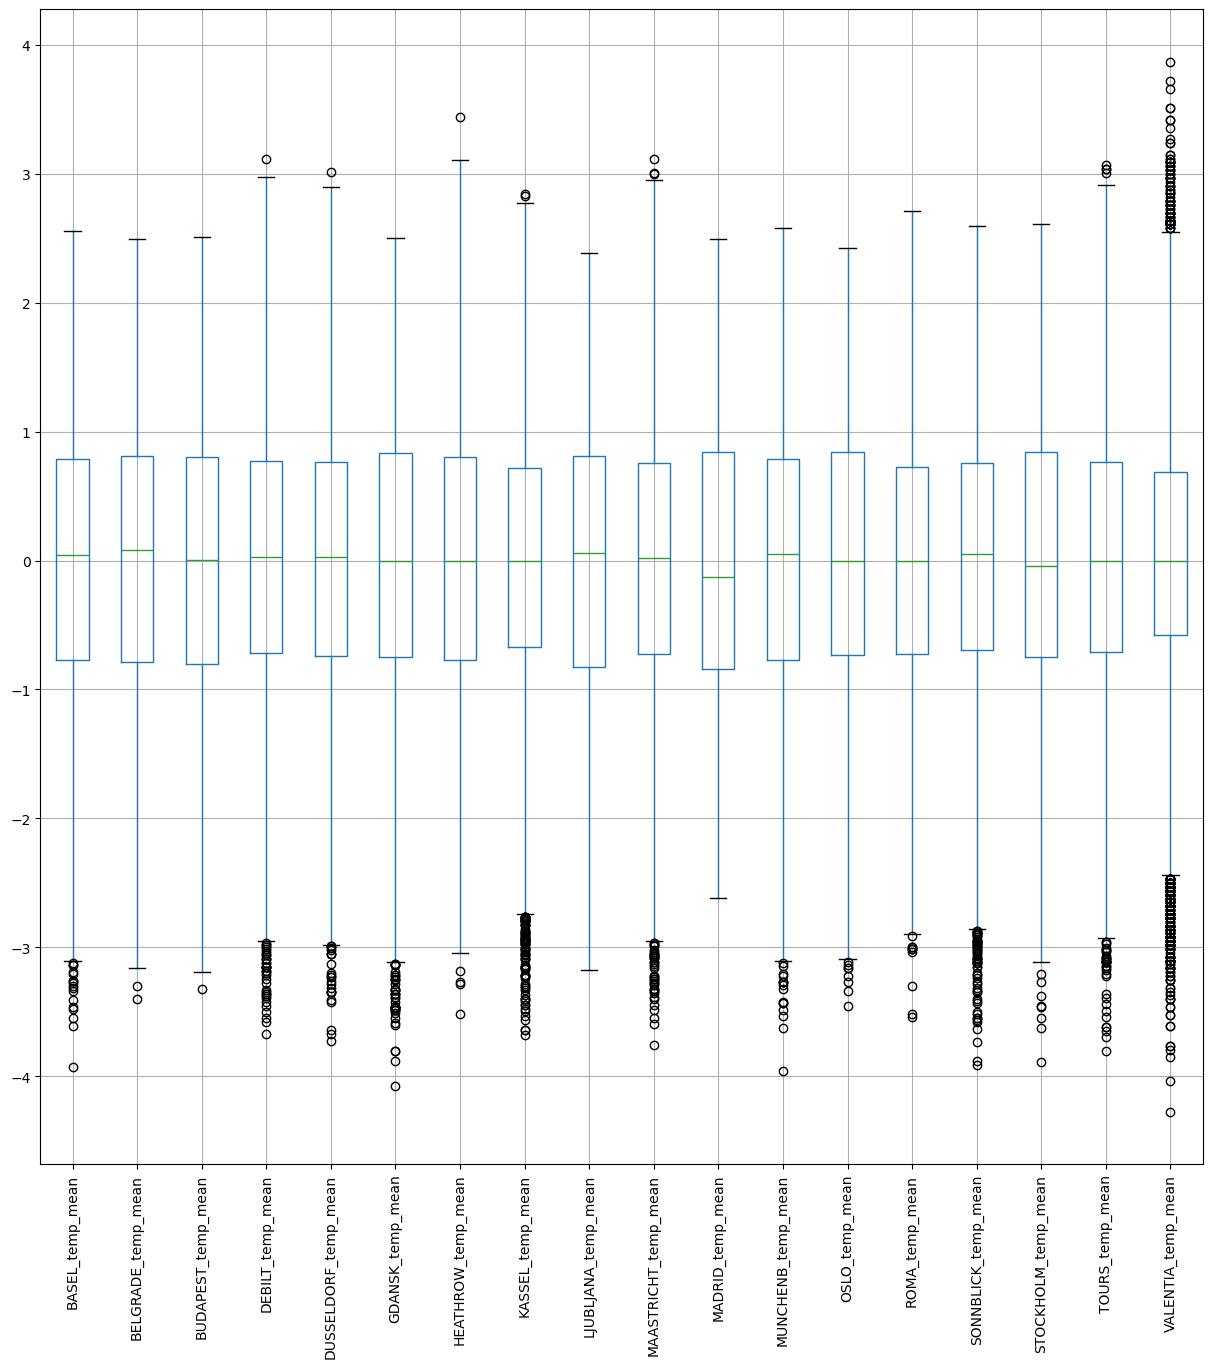

In [8]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)
plt.show()

In [9]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

## 05. Compute loss and gradient descent for Gdansk in 2021.

In [10]:
#Reduce your dataset to a single year
dfyear_2021 = df[df['DATE'].astype(str).str.startswith('2021')] #<-----INSERT YEAR HERE
dfyear_2021

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
22281  20210101      1        -1.112591           -0.653703   
22282  20210102      1        -1.221236           -0.551561   
22283  20210103      1        -1.384204           -0.415371   
22284  20210104      1        -1.329882           -0.517514   
22285  20210105      1        -1.384204           -0.699100   
...         ...    ...              ...                 ...   
22641  20211227     12        -0.515042           -1.277907   
22642  20211228     12        -0.012558           -1.130368   
22643  20211229     12        -0.107623           -0.846639   
22644  20211230     12         0.354120           -0.846639   
22645  20211231     12        -0.216268           -0.392673   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
22281           -0.005167         -1.111156             -1.239786   
22282           -0.005167         -1.016223             -1.195607   
22283           -0.005167         -1.063690             -1.136700   
22284           -0.005167         -1.142801             -1.269240   
22285           -0.005167         -1.126979             -1.239786   
...                   ...               ...                   ...   
22641           -0.005167         -0.699778             -0.621268   
22642           -0.005167         -0.193467             -0.297282   
22643           -0.005167         -0.082711             -0.150016   
22644           -0.005167          0.455245              0.424323   
22645           -0.005167          0.439422              0.380143   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
22281         -1.272886           -1.713826         -0.005705   
22282         -1.081061           -1.504171         -0.005705   
22283         -1.042696           -1.381872         -0.005705   
22284         -0.940389           -1.259573         -0.005705   
22285         -0.799717           -1.399343         -0.005705   
...                 ...                 ...               ...   
22641         -2.180860           -0.473366         -0.005705   
22642         -1.925093           -0.211297         -0.005705   
22643         -1.285675           -0.001641         -0.005705   
22644         -0.876447            0.208014         -0.005705   
22645         -0.237030            0.452612         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
22281            -0.995445             -1.222313         -1.473528   
22282            -0.741156             -1.282325         -1.716151   
22283            -0.862246             -1.207310         -1.608319   
22284            -0.886464             -1.297328         -1.648756   
22285            -0.874355             -1.267322         -1.810505   
...                    ...                   ...               ...   
22641            -0.910682             -0.292124         -0.368242   
22642            -0.595848             -0.142094         -0.476075   
22643            -0.971227             -0.052075         -0.691740   
22644            -0.910682              0.503038         -0.691740   
22645            -1.068099              0.383013         -0.637824   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
22281           -1.107756       -0.744778       -0.000746   
22282           -1.271132       -0.671969       -0.000746   
22283           -1.208295       -0.951071       -0.000746   
22284           -1.245997       -1.145228       -0.000746   
22285           -1.296267       -1.582083       -0.000746   
...                   ...             ...             ...   
22641           -0.554792       -1.812645       -0.000746   
22642           -0.328579       -1.387925       -0.000746   
22643           -0.114934       -1.497139       -0.000746   
22644            0.400329       -0.853992       -0.000746   
22645            0.412896       -0.963205       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
22

In [11]:
dfyear_2021.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.650000e+02  365.000000       365.000000          365.000000   
mean   2.021067e+07    6.526027         0.032909            0.128766   
std    3.454755e+02    3.452584         0.949455            1.005278   
min    2.021010e+07    1.000000        -2.212624           -2.049648   
25%    2.021040e+07    4.000000        -0.745913           -0.631005   
50%    2.021070e+07    7.000000        -0.012558           -0.040850   
75%    2.021100e+07   10.000000         0.883765            0.935177   
max    2.021123e+07   12.000000         2.078863            2.263027   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count        3.650000e+02        365.000000            365.000000   
mean        -5.166671e-03          0.072520              0.013712   
std          2.779368e-17          0.966594              0.975583   
min         -5.166671e-03         -2.503513             -2.668269   
25%         -5.166671e-03         -0.683956             -0.680175   
50%         -5.166671e-03          0.043867             -0.061656   
75%         -5.166671e-03          0.993200              0.880848   
max         -5.166671e-03          2.211512              2.559684   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        365.000000          365.000000      3.650000e+02   
mean           0.088705            0.085045     -5.705221e-03   
std            1.066883            1.010767      2.171381e-17   
min           -2.986526           -2.185550     -5.705221e-03   
25%           -0.748564           -0.683021     -5.705221e-03   
50%           -0.006839           -0.001641     -5.705221e-03   
75%            1.029017            0.994221     -5.705221e-03   
max            2.320641            2.391923     -5.705221e-03   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           365.000000            365.000000        365.000000   
mean              0.101863              0.062647          0.089456   
std               1.014904              0.964474          1.009745   
min              -1.855184             -2.572588         -2.470980   
25%              -0.704829             -0.667200         -0.664782   
50%              -0.087270             -0.022069         -0.085181   
75%               0.941995              0.923123          0.817918   
max               2.092351              2.423428          2.489325   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          365.000000      365.000000    3.650000e+02   
mean             0.090138        0.102767   -7.461638e-04   
std              0.926124        1.061531    3.474209e-18   
min             -2.125714       -2.152421   -7.461638e-04   
25%             -0.667898       -0.574890   -7.461638e-04   
50%              0.035875        0.068257   -7.461638e-04   
75%              0.865322        1.063315   -7.461638e-04   
max              2.109492        2.082643   -7.461638e-04   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           365.000000           365.000000       365.000000   
mean              0.045401             0.099155         0.116518   
std               1.026706             1.048349         0.985446   
min              -2.815348            -2.294481        -2.281025   
25%              -0.636209            -0.577681        -0.649512   
50%               0.036546             0.019467         0.056432   
75%               0.855551             0.940070         0.966314   
max               2.215685             2.358296         2.111511   

       VALENTIA_temp_mean  
count        3.650000e+02  
mean        -7.287352e-03  
std          1.650249e-17  
min         -7.287352e-03  
25%         -7.287352e-03  
50%         -7.287352e-03  
75%         -7.287352e-03  
max         -7.287352e-03

In [12]:
#Pick which weather station you want to use. Below is a 3D visualization of the temperatures for that year. ---> Gdansk

In [13]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear_2021 = dfyear_2021.drop(['DATE','MONTH'], axis=1)

In [14]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear_2021.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [15]:
n_rows_2021 = dfyear_2021.shape[0]
n_rows_2021

365

In [16]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows_2021,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows_2021,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear_2021['GDANSK_temp_mean'].to_numpy().reshape(n_rows_2021,1) #<----INSERT WEATHER STATION HERE

In [17]:
X.shape, y.shape

((365, 2), (365, 1))

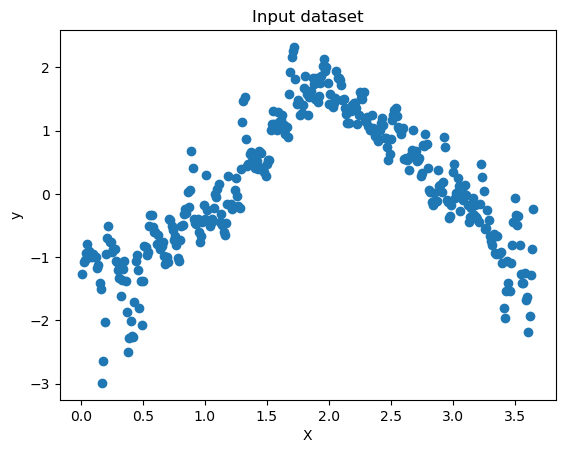

In [18]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear_2021['GDANSK_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [19]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear_2021['GDANSK_temp_mean'].min()

-2.9865259063130085

In [20]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear_2021['GDANSK_temp_mean'].max()

2.3206410448017847

In [21]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [22]:
compute_cost(X,y)

array([0.57149428])

In [23]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [25]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=200 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 93.8 ms
Wall time: 112 ms


In [26]:
theta

array([[0.20175164],
       [0.0067172 ]])

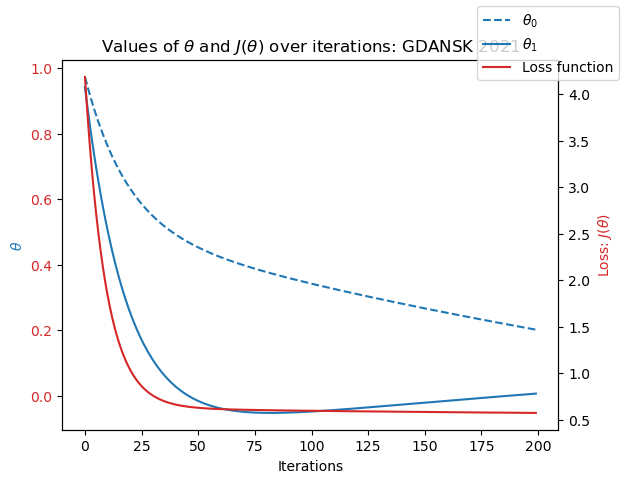

In [34]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations: GDANSK 2021')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend(),
plt.show()

In [28]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.77 s
Wall time: 1.79 s


In [29]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

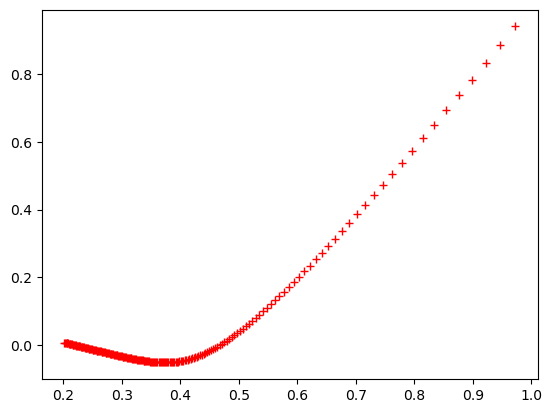

In [30]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show();
plt.show()

In [31]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=200 #<---start with the same iterations as above
theta_init=np.array([[0.35],[-0.05]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.01 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

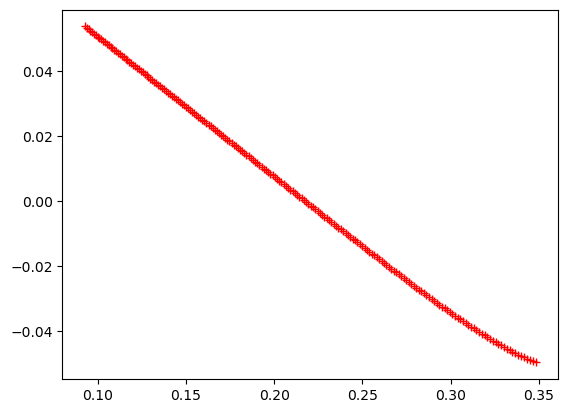

In [32]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()
plt.show()

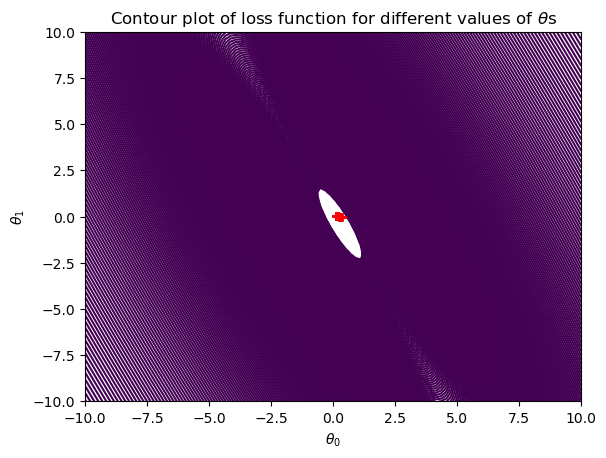

In [33]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()